## SMS Spam Collection Dataset

### The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged as being ham (legitimate) or spam.

### A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. 
This website is a subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. 

In [60]:
import pandas as pd
import os
import numpy as np

In [61]:
os.getcwd()

'D:\\Study'

In [62]:
os.chdir(r"D:\Study")

In [63]:
#sms=open('D:\Study\spam.csv', encoding="ISO-8859-1")

In [64]:
# sms

### Importing the file

In [65]:
import pandas as pd

sms=pd.read_csv(r"C:\Users\22000370\Downloads\spam.csv", encoding='ISO-8859-1')


In [66]:
sms.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

### Ham- Message is non-spam i.e. genuine 



### Spam- Message is irrelevant i.e. spam

In [67]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Renaming the columns v1 and v2 to label and message respectively

In [68]:
sms.rename(columns={"v1":"label","v2":"message"},inplace=True)

In [69]:
sms

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


### Dropping the irrelevant columns

In [70]:
sms.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [71]:
sms.columns

Index(['label', 'message'], dtype='object')

In [72]:
sms

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Exploratory Data Analysis

In [73]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Checking the entire data

In [74]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Repeated messages are there as count of unique messages is quite low in the data

### Checking out only the labels column

In [75]:
sms.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

1. There are 4825 unique messages which are ham out of which 4516 messages are unique.
2. There are 747 spam messages out of which 653 are unique
3. "Sorry, I'll call later" is the most popular ham message which is there in the data with a repetition of 30 times.
4. While "Please call our customer service representative" is the most popular spam message with a repetition of 4 times.

### Feature Engineering

In [76]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [77]:
sms['message'].value_counts().rename_axis(['message']).reset_index(name='counts').head()


,message,counts
0,"Sorry, I'll call later",30
1,I cant pick the phone right now. Pls send a me...,12
2,Ok...,10
3,7 wonders in My WORLD 7th You 6th Ur style 5th...,4
4,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...",4


"Sorry, I'll call later" tops the list of messages with a frequency of 30 followed by "I can't pick the phone...." with a frequency of 12.


In [78]:
##reset_index- 

## Data Visualization

In [79]:
import matplotlib.pyplot as plt

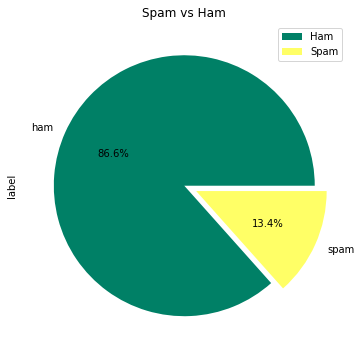

In [80]:
sms["label"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',cmap='summer')
plt.title("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

#autopct='%1.1f%%'-decimal point adjustments


About 86% of our messages are non-spam and 13% of our messages are spam

Text(0, 0.5, 'Frequency')

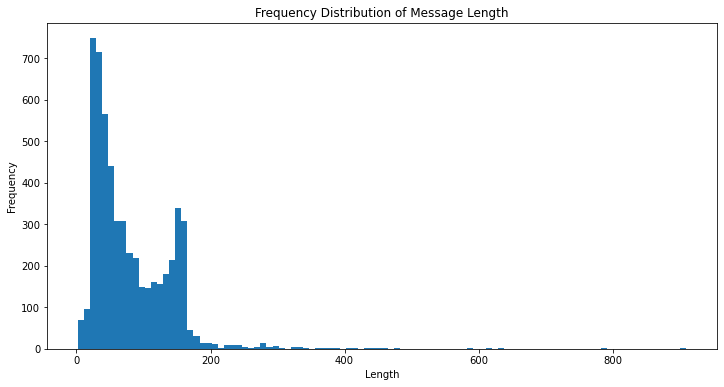

In [81]:
plt.figure(figsize=(12,6))
sms['length'].plot(bins=100, kind='hist') # with 100 length bins (100 length intervals) 
plt.title("Frequency Distribution of Message Length")
plt.xlabel("Length")
plt.ylabel("Frequency")

Most of the messages as we can see are less than the range of 200 but there are a few long messages too.

In [82]:
sms["length"].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

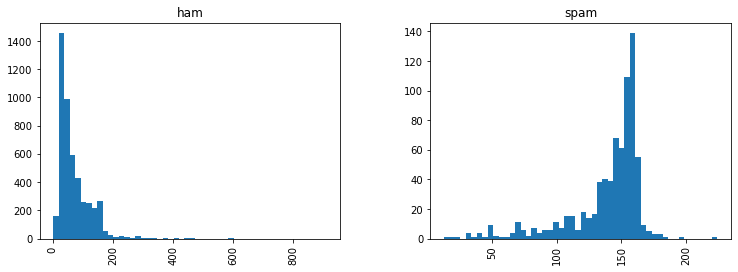

In [83]:
sms.hist(column='length', by='label', bins=50,figsize=(12,4))

This indicates that spam messages are usually longer and ham messages are very specific.

### Text Pre-Processing

Ex.of, from, the, and etc. type of words are repeated again and again in the paragraph. Also these words do not play any role when we are trying to analyse the text in cases like sentiment analysis etc.

So stopwords helps to remove these words from the paragraph.


In [84]:
#Data Cleaning and Data Pre-Processing
import re
import nltk
#nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet=WordNetLemmatizer()
corpus=[]

for i in range(0,len(sms)):
    review=re.sub('[^a-zA-Z]',' ',sms['message'][i]) #removing all characters except A-Z and a-z
    review=review.lower()
    review=review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) #if word not in stopwords we will do stemming
    corpus.append(review)  #appending to the list named corpus

In [85]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

### Wordcloud (to understand commonly used words in Ham and Spam)

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. 
Significant textual data points can be highlighted using a word cloud.

In [89]:
spam_sms= sms[sms["label"] == "spam"]["message"]
ham_sms = sms[sms["label"] == "ham"]["message"]
print("No of spam messages : ",len(spam_sms))
print("No of ham messages : ",len(ham_sms))

No of spam messages :  747
No of ham messages :  4825


### Spam WordCloud

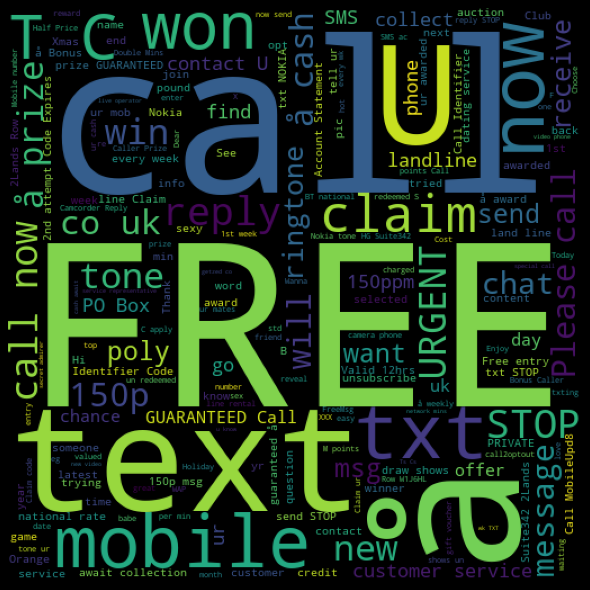

In [111]:
spam_words=' '.join(list(sms[sms["label"]=="spam"]["message"]))
spam_wc=WordCloud(width=512,height=512).generate(spam_words)
plt.figure(figsize=(10,8),facecolor="k")
plt.imshow(spam_wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Ham WordCloud

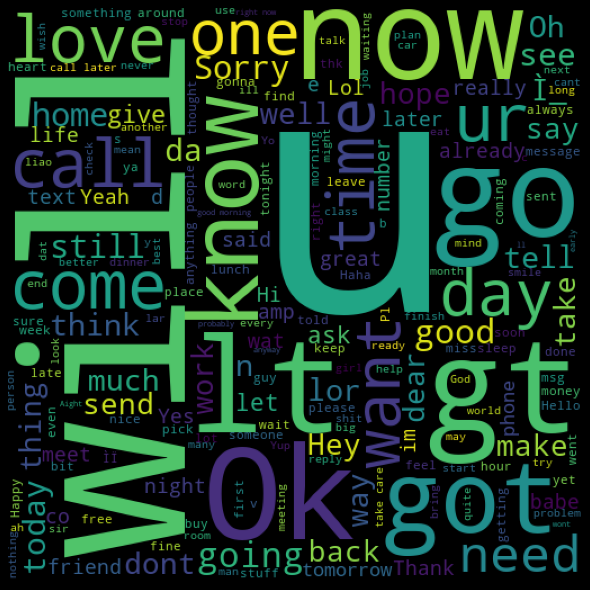

In [113]:
ham_words=' '.join(list(sms[sms["label"]=="ham"]["message"]))
ham_wc=WordCloud(width=512,height=512).generate(ham_words)
plt.figure(figsize=(10,8),facecolor="k")
plt.imshow(ham_wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### TF-IDF Model Creation

There is less semantic meaning in case of Bag of Words since values are there only in the range of 0 and 1. 

### TF = No.of repetition of words in a sentence / No. of words in a sentence

### IDF(Inverse Document Frequency) = log(no. of sentences) / (No. of sentences containing the word)

In [38]:
###Creating a TF-IDF Model
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=1000)
X=cv.fit_transform(corpus).toarray()

In [39]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
X.shape #We took top 1000 frequently occuring elements(independent feature)

(5572, 1000)

In [68]:
import numpy as np
np.set_printoptions(threshold=np.inf)
print(X)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [41]:
#We have 7021 columns, out of which we only need the most frequent elements and thus we don't need all these 7021 columns but only frequent columns and frequent words.

Now we also need the output data i.e. the label column  which specifies the ham or spam.

In [42]:
#Y=pd.get_dummies(sms["label"])

In [43]:
#Y   #in whichever column there is 1 it is giving that particular label to the message

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [44]:
#Y=Y.iloc[:,1].values #removing 

In [45]:
#Y #one column specifies all information

### Target Variable Encoding

We did one-hot encoding on the target variable where the the messages which are spam are denoted as 1 while the message containing ham are 0.

In [46]:
sms["label"]=np.where(sms["label"]=="spam",1,0)

In [47]:
y=sms["label"]


In [48]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int32

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.2, random_state=88)

In [52]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB().fit(X_train,y_train)

In [53]:
y_pred=spam_detect_model.predict(X_test)

In [54]:
X_test.shape

(1115, 1000)

In [55]:
X_train.shape

(4457, 1000)

In [56]:
#adding X_train and X_test will give you X

In [57]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
y_test

2928    0
1315    0
679     0
5547    1
4460    0
       ..
1165    0
4319    0
5018    0
2358    0
818     0
Name: label, Length: 1115, dtype: int32

In [59]:
type(y_test)

pandas.core.series.Series

### Comparing between the y_test and y_pred

In [60]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(y_test)

2928    0
1315    0
679     0
5547    1
4460    0
1289    0
4207    0
3782    0
338     0
3602    0
4104    0
3865    0
5204    0
2858    0
2376    0
1884    0
1322    0
4197    1
3031    0
917     0
3661    0
2256    0
4610    0
3581    0
4409    0
1894    1
1054    0
4423    0
5514    0
4622    0
4747    0
2286    0
5527    0
3364    0
2       1
4408    1
2274    0
2216    0
3098    0
2198    0
5509    0
1307    1
4645    1
1938    0
4308    0
3987    0
3719    0
1183    0
3010    0
3682    0
4505    0
5102    1
2705    0
3408    0
3094    0
2114    1
1285    0
3302    0
2228    0
126     0
1965    0
104     0
2091    0
3567    0
2598    0
4556    0
5518    0
1454    0
4082    0
2004    0
998     0
2882    0
888     0
5303    0
3559    0
181     0
2140    0
3689    0
5563    0
4729    0
956     0
1347    0
4773    0
5302    0
5406    0
1909    0
466     0
3845    0
3513    0
1653    0
3570    0
4264    0
1556    0
1722    0
5565    0
1752    0
4957    0
1732    0
1669    0
933     0


In [61]:
import numpy as np
np.set_printoptions(threshold=np.inf)
print(y_pred)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 

In [62]:
#We checked y_pred and y_test

In [63]:
from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[966,   2],
       [ 21, 126]], dtype=int64)

In [64]:
#966+126(Correctly predicted out of total observations)

In [67]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.979372197309417

### Therefore, we got a 97% accuracy from our model